<a href="https://colab.research.google.com/github/Heoyuna0819/deeplearning/blob/main/DL_regression_abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

file_path = "/content/drive/MyDrive/abalone.csv"
df = pd.read_csv(file_path)
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [225]:
df=df.drop(columns=['id'])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [226]:
X=df.drop('Rings',axis=1)
X.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [227]:
y=df['Rings']
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


In [228]:
X = pd.get_dummies(X, columns=['Sex'])
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,True,False,False


In [229]:
X = X.values

In [230]:
X

array([[0.455, 0.365, 0.095, ..., False, False, True],
       [0.35, 0.265, 0.09, ..., False, False, True],
       [0.53, 0.42, 0.135, ..., True, False, False],
       ...,
       [0.6, 0.475, 0.205, ..., False, False, True],
       [0.625, 0.485, 0.15, ..., True, False, False],
       [0.71, 0.555, 0.195, ..., False, False, True]], dtype=object)

In [231]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((3341, 10), (3341,), (836, 10), (836,))

In [232]:
from sklearn.preprocessing import StandardScaler

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [233]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(10,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 709 (2.77 KB)

 Trainable params: 709 (2.77 KB)

 Non-trainable params: 0 (0.00 B)

In [234]:
#데이터타입변환
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [235]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 98.4687 - mse: 98.4687 - val_loss: 43.6878 - val_mse: 43.6878
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.3642 - mse: 27.3642 - val_loss: 8.4215 - val_mse: 8.4215
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1838 - mse: 8.1838 - val_loss: 7.0233 - val_mse: 7.0233
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0711 - mse: 7.0711 - val_loss: 6.7077 - val_mse: 6.7077
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4594 - mse: 6.4594 - val_loss: 6.5632 - val_mse: 6.5632
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0396 - mse: 6.0396 - val_loss: 6.2418 - val_mse: 6.2418
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8713 - mse: 5.8713 - val_loss: 6.1308 - val_mse: 6.1308
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0012 - mse: 6.0012 - val_loss: 6.0489 - val_mse: 6.0489
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

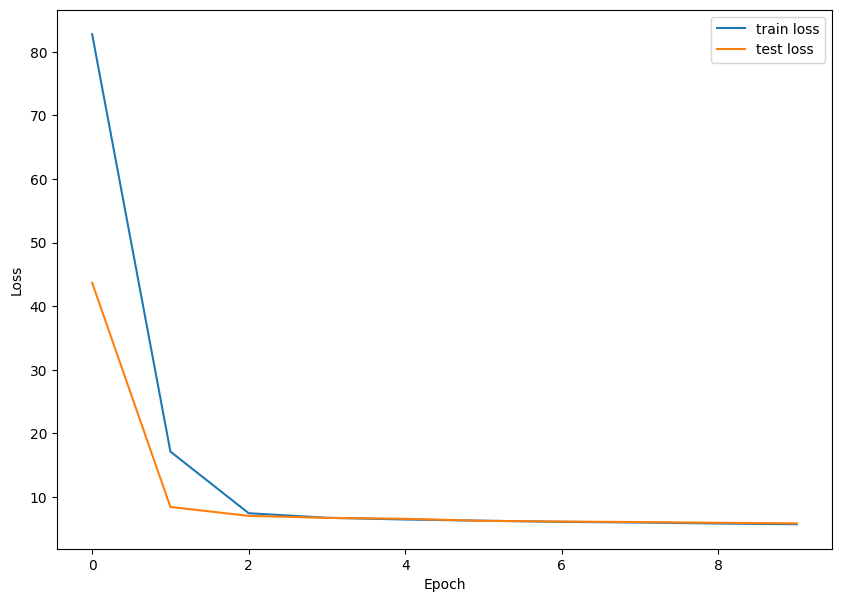

In [236]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [237]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4510 - mse: 5.4510 


[5.853487014770508, 5.853487014770508]